# En el presente script veremos como cargar el modelo ya entrenado para poder usarlo y hacer predicciones

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# base de datos de digitos escritos a mano
from tensorflow.keras.datasets import mnist

# Librería para separar datos:
from sklearn.model_selection import train_test_split

# Importamos función para usar el modelo entrenado
import joblib

## Cargamos datos de entrenamiento y pruebas:

In [2]:
# cargamos los datos:
(train_data, train_labels), (complement_train_data, complement_train_labels) = mnist.load_data()

# subdividimos el complemento de los datos de entrenamiento 
# para extraer datos de 'test' y 'validation' 

#  -Datos de entrenamiento: 100% de los datos de entrenamiento
#  -Datos de validation: 50% del complemento de entrenamiento
#  -Datos de test:       50% del complemento de entrenamiento

#p_train = 0.8 # porcentaje de datos de entrenamiento
p_validation=0.5  # porcentaje de datos de validación
p_test=0.5 # porcentaje de datos de pruebas

validation_data, test_data, validation_labels, test_labels = train_test_split (complement_train_data, complement_train_labels, test_size=p_validation, train_size=p_test, random_state=42)

In [3]:
# Imprimimos dimensiones:
print('\nLas dimensiones de los datos de entrenamiento son: ', train_data.shape)
print('Las dimensiones de los labels de entrenamiento son: ', train_labels.shape)

print('\nLas dimensiones de los datos de validación son: ', validation_data.shape)
print('Las dimensiones de los labels de validación son: ', validation_labels.shape)

print('\nLas dimensiones de los datos de prueba son: ', test_data.shape)
print('Las dimensiones de los labels de prueba son: ', test_labels.shape)


Las dimensiones de los datos de entrenamiento son:  (60000, 28, 28)
Las dimensiones de los labels de entrenamiento son:  (60000,)

Las dimensiones de los datos de validación son:  (5000, 28, 28)
Las dimensiones de los labels de validación son:  (5000,)

Las dimensiones de los datos de prueba son:  (5000, 28, 28)
Las dimensiones de los labels de prueba son:  (5000,)


In [4]:
# Las etiquetas toman valores enteros entre 0 y 9, es decir, hay 10 clases posibles
classes = np.unique(train_labels)
print('valores de las clases: ',classes)

n_clases = len(classes)
n_clases

valores de las clases:  [0 1 2 3 4 5 6 7 8 9]


10

In [5]:
# Definimos el nombre de las etiquetas:
class_names = ['cero', 'uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve']

## Codificación de features (de entrenamiento, validación y pruebas) que pasarán por el árbol de decisiones:

In [6]:
# Extraemos dimensiones de features de entrenamiento, validación y de prueba
s_a = train_data.shape
s_b = validation_data.shape
s_c = test_data.shape

# Codificamos los datos de entrenamiento, validación y de prueba que pasaran por la red
# (en vez de usar arreglos 3D de 'N x P x Q', usaremos arreglos 2D de 'N x P*Q' )
x_train = train_data.reshape((s_a[0],  s_a[1]*s_a[2]))
x_validation = validation_data.reshape((s_b[0],  s_b[1]*s_b[2]))
x_test = test_data.reshape((s_c[0],  s_c[1]*s_c[2]))

# normalizamos valores (dividiendo entre el máximo '255') para que los valores esten entre 0 y 1. 
# y los pasamos al tipo 'float32'
x_train = x_train.astype('float32')/255
x_validation = x_validation.astype('float32')/255
x_test = x_test.astype('float32')/255

In [7]:
# Usamos los labels sin codificar:
y_train = train_labels
y_validation = validation_labels
y_test = test_labels

In [8]:
# Debido a que no usaremos los datos de validación, concatenamos los datos en un solo conjunto de pruebas:
x_test = np.concatenate((x_test, x_validation), axis=0)
y_test = np.concatenate((y_test, y_validation), axis=0)

# Cargamos el modelo entrenado y lo usamos:

In [9]:
# Cargamos el modelo entrenado:
clasif_DT = joblib.load('modelo_entrenado_DT_Mnist.pkl')

In [10]:
# Una vez que hemos cargado el clasificador,
# lo aplicamos para generar etiquetas predichas:
y_test_predicted = clasif_DT.predict(x_test)
y_test_predicted.shape

(10000,)

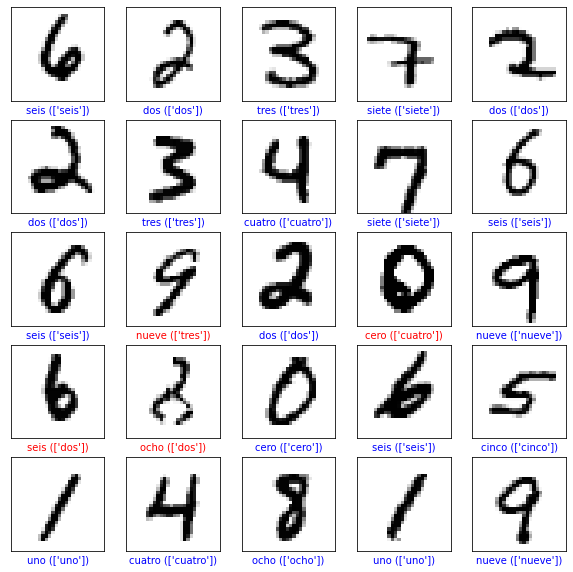

In [11]:
# Visualizamos imagenes predichas usando los datos de pruebas

plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid('off')   

    true_label =  y_test[i]    
    aprox_label = y_test_predicted[i]

    if true_label == aprox_label:
        col = 'blue'
    else:
        col = 'red'

    imagen = x_test[i,:].reshape(28,28)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel('{} ({})'.format( class_names[true_label], [class_names[aprox_label]]), color=col)